# Resources

## Linear Regression from Scratch
https://towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72

## Linear Regression from Scratch in Python
https://mubaris.com/posts/linear-regression/

## Machine Learning from Scratch
https://github.com/chasinginfinity/ml-from-scratch

## Linear Regression with Practical Implementation
https://medium.com/machine-learning-researcher/linear-regression-algorithm-in-machine-learning-87c945019cf1

## Linear Regression Notes by Andrew Ng
https://www.coursera.org/learn/machine-learning


## Master Polynomial Regression with Easy-to-Follow Tutorials
https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression/#:~:text=Polynomial%20regression%20is%20a%20form,convert%20it%20into%20Polynomial%20regression.


# 00. Setting up (including Import Library, Read Data, etc.)

In [1]:
FILE_NAME         = 'headbrain.csv'
INDEPENDANT_FIELD = 'Head Size(cm^3)'
DEPENDANT_FIELD   = 'Brain Weight(grams)'

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
# Reading Data
data = pd.read_csv(FILE_NAME)
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
# Collecting X and Y
X = data[INDEPENDANT_FIELD].values
y = data[DEPENDANT_FIELD].values

# 01. Linear Regression using Least Squares

In [5]:
# Calculating coefficient

# Mean X and y
mean_x = np.mean(X)
mean_y = np.mean(y)

# Total number of values
n = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
w1 = numer / denom
w0 = mean_y - (w1 * mean_x)

# Printing coefficients
print('w0 =', w0)
print('w1 =', w1)

w0 = 325.57342104944223
w1 = 0.26342933948939945


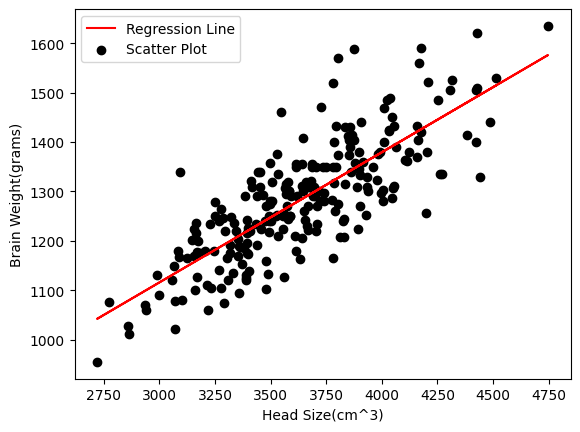

In [6]:
# Plotting Values and Regression Line

y_pred = w0 + w1 * X

# Ploting Regression Line
plt.plot(X, y_pred, color='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, y, c='black', label='Scatter Plot')

plt.xlabel(INDEPENDANT_FIELD)
plt.ylabel(DEPENDANT_FIELD)
plt.legend()
plt.show()

In [7]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = w0 + w1 * X[i]
    rmse += (y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print('rmse = ', rmse)

rmse =  72.1206213783709


In [8]:
# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = w0 + w1 * X[i]
    ss_tot += (y[i] - mean_y) ** 2
    ss_res += (y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print('r2 =', r2)

r2 = 0.6393117199570003


# 02. Linear Regression using sklearn

In [9]:
# Validation using Scikit Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
X = X.reshape(-1, 1)
linear_regressor = LinearRegression()
lr = linear_regressor.fit(X, y)
print('w0 =', lr.intercept_)
print('w1 =', lr.coef_)

y_pred = lr.predict(X)
r2_score = lr.score(X, y)
mse = mean_squared_error(y, y_pred)
print('rmse =', np.sqrt(mse))
print('r2   =', r2_score)

w0 = 325.5734210494426
w1 = [0.26342934]
rmse = 72.1206213783709
r2   = 0.639311719957


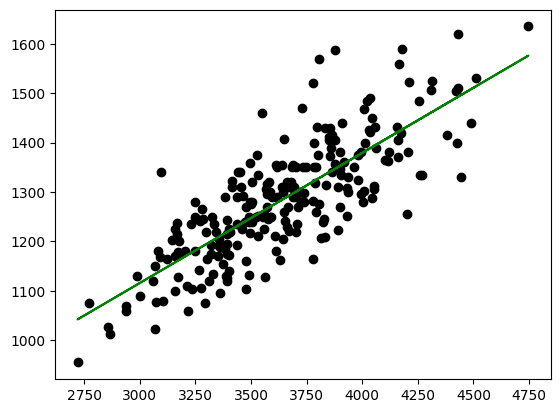

In [11]:
# Ploting Regression Line
y_pred = lr.intercept_ + lr.coef_ * X
plt.plot(X, y_pred, color='green', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, y, c='black', label='Scatter Plot')

In [12]:
y_pred = lr.intercept_ + lr.coef_ * X
mse = mean_squared_error(y, y_pred)
print('rmse =', np.sqrt(mse))

rmse = 72.1206213783709


# 03. Linear Regression with Polynomial Features

## (03.01) Import all the libraries.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

## (03.02) Create and visualize the data.

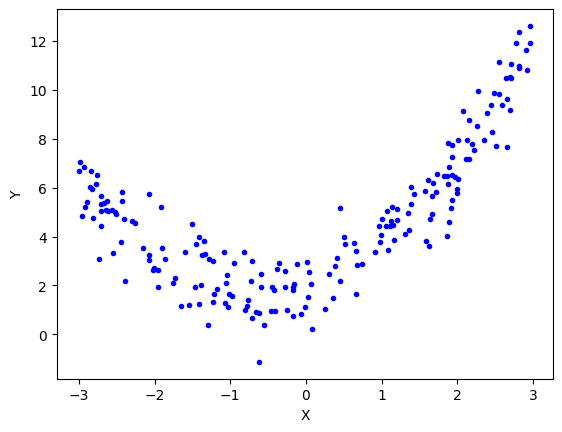

In [14]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## (03.03) Split data in the train and test set.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## (03.04) Apply simple linear regression.

0.3553040366788951


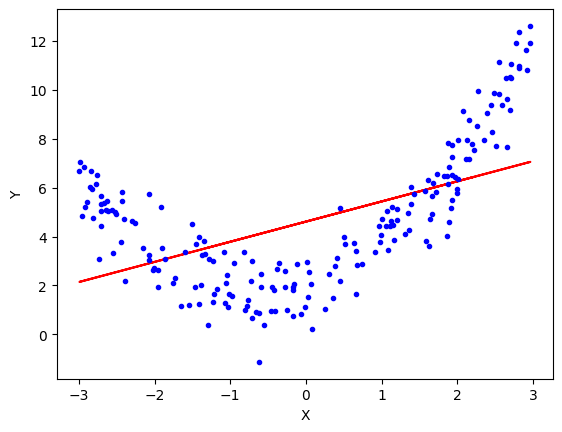

In [16]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## (03.05) Apply polynomial regression.

In [17]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

print(lr.coef_)
print(lr.intercept_)

0.9107218798691331
[[0.         0.93069516 0.7810959 ]]
[2.05116049]


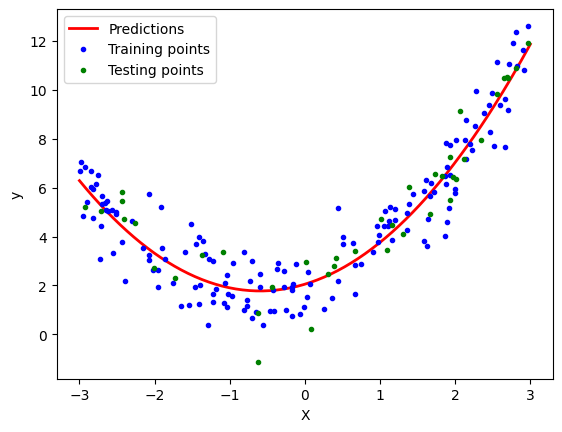

In [18]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()